<a href="https://colab.research.google.com/github/cledirsm/cledir/blob/main/Analise_MGLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importanto e instalando bibliotecas 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 223.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 160.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

Importanto e plotando ticker da Magazine Luiza

In [17]:
ticker = yf.download(tickers = "MGLU3.SA", period = "1y")
ticker

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-17 00:00:00-03:00,6.27,6.38,6.12,6.12,6.12,61801100
2022-01-18 00:00:00-03:00,6.08,6.23,5.89,5.89,5.89,117014400
2022-01-19 00:00:00-03:00,6.01,6.60,6.01,6.31,6.31,197823800
2022-01-20 00:00:00-03:00,6.36,6.81,6.35,6.65,6.65,140783000
2022-01-21 00:00:00-03:00,6.54,7.08,6.46,6.90,6.90,151141500
...,...,...,...,...,...,...
2023-01-10 00:00:00-03:00,2.79,3.09,2.76,3.05,3.05,192054800
2023-01-11 00:00:00-03:00,3.07,3.11,2.90,3.03,3.03,170364500
2023-01-12 00:00:00-03:00,2.70,3.28,2.69,3.19,3.19,383841100


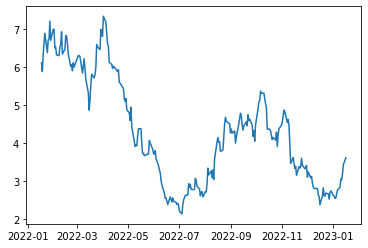

In [18]:
plt.plot(ticker['Close'])

In [31]:
ticker.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], inplace = True)

In [22]:
def SMA(ticker, period = 26, column = "Close"):
  return ticker[column].rolling(window = period).mean()

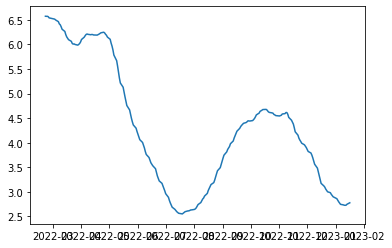

In [23]:
plt.plot(SMA(ticker))

Definindo Função de Média 

In [25]:
def EMA(ticker, period = 12, column = "Close"):
  return ticker[column].ewm(span = period, adjust = False).mean()

Definindo Média Ajustada

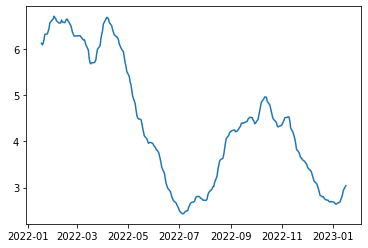

In [26]:
plt.plot(EMA(ticker))

In [29]:
ticker["SMA"] = SMA(ticker)
ticker["EMA"] = EMA(ticker)

ticker

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA
Date,,,,,,,,
2022-01-17 00:00:00-03:00,6.27,6.38,6.12,6.12,6.12,61801100,NaN,6.120000
2022-01-18 00:00:00-03:00,6.08,6.23,5.89,5.89,5.89,117014400,NaN,6.084615
2022-01-19 00:00:00-03:00,6.01,6.60,6.01,6.31,6.31,197823800,NaN,6.119290
2022-01-20 00:00:00-03:00,6.36,6.81,6.35,6.65,6.65,140783000,NaN,6.200938
2022-01-21 00:00:00-03:00,6.54,7.08,6.46,6.90,6.90,151141500,NaN,6.308486
...,...,...,...,...,...,...,...,...
2023-01-10 00:00:00-03:00,2.79,3.09,2.76,3.05,3.05,192054800,2.726538,2.745064
2023-01-11 00:00:00-03:00,3.07,3.11,2.90,3.03,3.03,170364500,2.724615,2.788901
2023-01-12 00:00:00-03:00,2.70,3.28,2.69,3.19,3.19,383841100,2.727308,2.850608


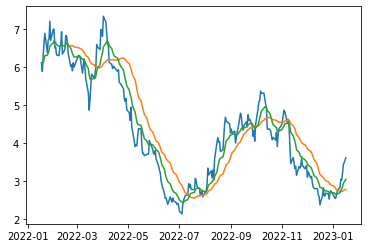

In [32]:
plt.plot(ticker)